In [103]:
import dataprofiler
from ydata_profiling import ProfileReport
import pandas as pd
import json
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, fbeta_score, recall_score, precision_score, root_mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [74]:
df = pd.read_csv('census.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.tail()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#profile = dataprofiler.Profiler(df)

In [ ]:
#readable_report = profile.report(report_options={"output_format": "pretty"})

In [ ]:
#data_profile = json.dumps(readable_report, indent=4)

In [ ]:
#profile = ProfileReport(df, title="Profiling Report")

In [ ]:
#profile.to_widgets()

- Dataset has 23 (0.1%) duplicate rows
- Potential feature with capital gain and loss. Lots, of zeros. HasInvestments Yes, No
- Need to check out race and country for imbalances
- 23 duplicate rows check to see if we can drop them
- Lets predict salary level, binarize salary, add HasInvestments feature, 

In [16]:
df.drop_duplicates(inplace = True)

In [66]:

"""label = 'salary'
y= df[label]
X = df.drop(label, axis=1)

cat_features = X.dtypes[df.dtypes=='object'].index
cont_features = X.dtypes[df.dtypes!='object'].index

X_categorical = X[cat_features].values
X_continuous = X.drop(*[cont_features], axis=1)

encoder = OneHotEncoder(handle_unknown="ignore")
lb = LabelBinarizer()

X_cat = encoder.fit_transform(X_categorical)
y = lb.fit_transform(y.values).ravel()

X_tran = np.concatenate([X_continuous, X_categorical], axis=1)

pd.DataFrame(X_tran)"""

In [75]:
#manual feature engineering, create my own label and binarize myself
df['investor'] = 1
df['living_wage'] = 1

for i in df.index:
    if df['salary'][i]== '<=50K':
        df.loc[i, 'living_wage'] = 0
    if df['capital-gain'][i] == 0 and df['capital-loss'][i] == 0:
        df.loc[i, 'investor'] = 0

In [78]:
# Get rid of stuff
df.drop(columns=['salary', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

In [80]:
# quick OneHot
df = pd.get_dummies(df)

In [81]:
#split train test data
train, test = train_test_split(df, test_size=0.3)

In [82]:
#Get X and y
y_train = train['living_wage']
X_train = train.drop('living_wage', axis=1)

y_test = test['living_wage']
X_test = test.drop('living_wage', axis=1)


In [132]:
def score(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1, zero_division=1)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    rmse = root_mean_squared_error(y_test, y_pred)


    print(f"Accuracy: {accuracy}, \nMAE: {mae}, \nF1: {fbeta}, \nPrecision: {precision}, \nRecall: {recall}, \nR2: {rmse}")


In [91]:
# Create model
rfc = RandomForestClassifier(random_state=42)

In [92]:
rfc.fit(X_train, y_train)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

<Axes: >

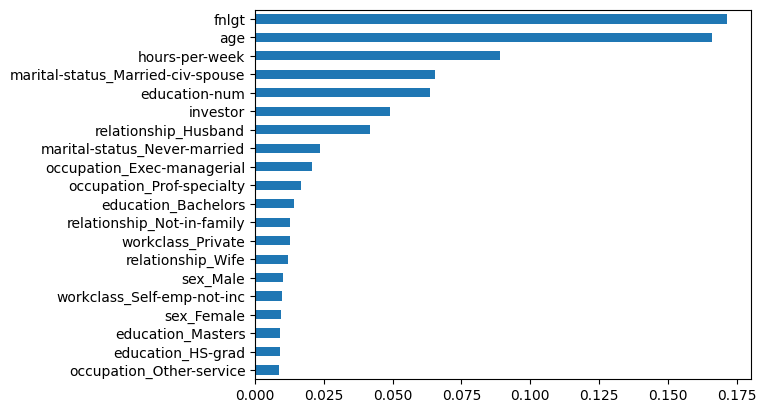

In [93]:
importances = pd.Series(rfc.feature_importances_, index=rfc.feature_names_in_)
important = importances.nlargest(20)
important.sort_values(ascending=True, inplace=True)
important.plot(kind='barh')

In [94]:
y_pred = rfc.predict(X_test)

In [133]:
score(y_test, y_pred)

Accuracy: 0.8213737332377931, 
MAE: 0.17862626676220697, 
F1: 0.5107933837959069, 
Precision: 0.7779675491033304, 
Recall: 0.38021702838063437, 
R2: 0.4226420078059054


# We will try to find better parameters

In [112]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [126]:
grid ={
 'bootstrap': [False],
 'criterion': ['gini', 'entropy', 'logloss'],
 'max_depth': [i for i in range(1,11)],
 'max_features': ['sqrt'],
 'max_leaf_nodes': [i for i in range(1,11)],
 'n_estimators': [i for i in range(1, 251)],
 'n_jobs': [i for i in range(1, 10)],
 'random_state': [i for i in range(1, 101)]
}

In [127]:
rand_search = RandomizedSearchCV(estimator = rfc, param_distributions = grid, cv=5, n_iter=50)

In [128]:
rand_search.fit(X_train, y_train)

/home/swatts/miniconda3/envs/notebook/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/home/swatts/miniconda3/envs/notebook/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/swatts/miniconda3/envs/notebook/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/swatts/miniconda3/envs/notebook/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valida

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [False],
                                        'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [129]:
print(rand_search.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=8, max_leaf_nodes=9,
                       n_estimators=46, n_jobs=3, random_state=84)


In [130]:
y_pred = rand_search.predict(X_test)

In [131]:
score(y_test, y_pred)

Accuracy: 0.8213737332377931, 
MAE: 0.17862626676220697, 
F1: 0.5107933837959069, 
Precision: 0.7779675491033304, 
Recall: 0.38021702838063437, 
R2: 0.4226420078059054


In [ ]:

#Best model was default RCF
rfc2 = RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=9)
rfc2.fit(X_train, y_train)
y_pred2 = rfc2.predict(X_test)

score(y_test, y_pred)

Accuracy 0.827699241958615


In [ ]:
rfc2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 9,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

After going through a couple of hours of hyper tuning, I find the default settings for RandomForest still performs best. therefore I will skip tuning this in the actual piepline. More EDA could probably find biases and other issues. I think it is overkill for this project.